What is classification?

Classification involves deciding whether a sample is part of one class or another (single-class classification). If there are multiple class options, it's referred to as multi-class classification.



---



* In This note book we will try to classify whether the patient will have a heart disease or not through the following steps:-



1.   Load the data.
2.   Explanatory Data analysis (EDA).
3.   Feature engineering.
4.   Model Training, Validation, and Prediction




---
* Heart Disease Data Dictionary

A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a subject matter expert (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
      *   0: Typical angina: chest pain related decrease blood supply to the heart
      *   1: Atypical angina: chest pain not related to heart
      *   2: Non-anginal pain: typically esophageal spasms (non heart related)
      *   3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
      *   anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
      *   serum = LDL + HDL + .2 * triglycerides
      *   above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
      * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
      * 0: Nothing to note
      * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
      * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
      * looks at stress of heart during excercise
      * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
      * 0: Upsloping: better heart rate with excercise (uncommon)
      * 1: Flatsloping: minimal change (typical healthy heart)
      * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
      * colored vessel means the doctor can see the blood passing through
      * the more blood movement the better (no clots)
13. thal - thalium stress result
      * 1,3: normal
      * 6: fixed defect: used to be defect but ok now
      * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


---

In [ ]:
#loading libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models

from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Train = "/content/drive/MyDrive/machine learning/heart-disease.csv"

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/machine learning/heart-disease.csv')

In [ ]:
df.shape 

(303, 14)

In [ ]:
# Let's check the top 5 rows of our dataframe
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


exploratory data analysis (EDA)

In [ ]:
# And the top 10
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


`value_counts()` allows you to show how many times each of the values of a categorical column appear.

In [ ]:
# Let's see how many positive (1) and negative (0) samples we have in our dataframe
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

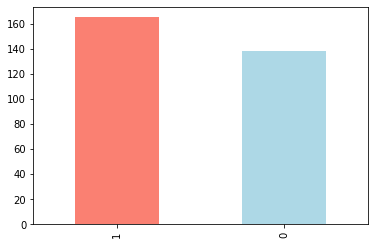

In [ ]:
# Plot the value counts with a bar graph
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

`df.info() `get some quick insights on your dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Another way to get some quick insights on your dataframe is to use  `df.describe()` . `describe() ` shows a range of different metrics about your numerical columns such as mean, max and standard deviation.

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

We'll create the plot again with  `crosstab()`  and `plot()`, then add some helpful labels to it with `plt.title()`,` plt.xlabel()` and more.

To add the attributes, you call them on plt within the same cell as where you make create the graph.

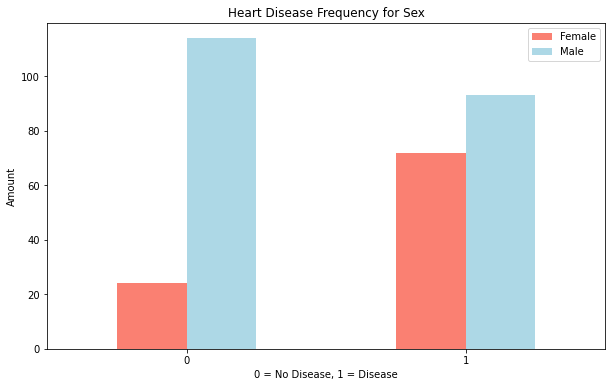

In [ ]:
# Create a plot
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

# Add some attributes to it
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

Lets now have have a look at the statistical distribution for each feature

Why?

Because this may give an idea of which independent variables may or may not have an impact on our target variable.

We can do this using df.corr() which will create a correlation matrix for us, in other words, a big table of numbers telling us how related each variable is the other.

In [ ]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


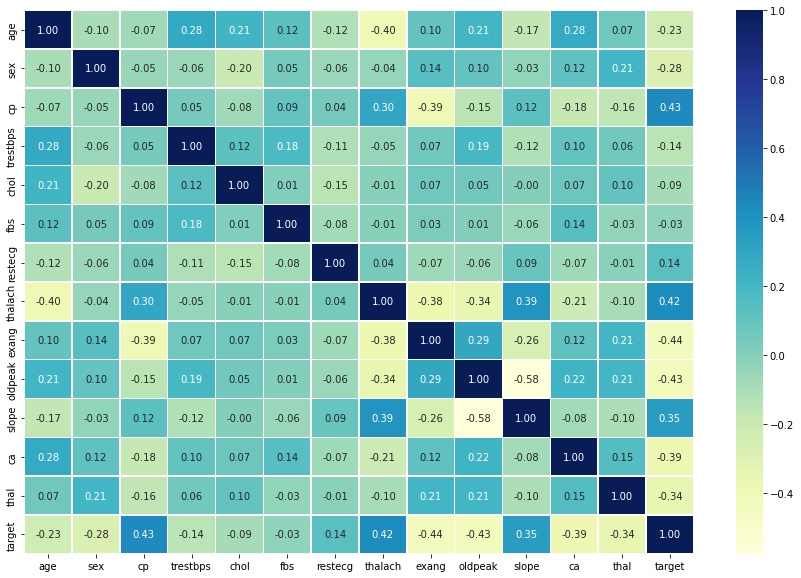

In [ ]:
# Let's make it look a little prettier
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

###**Checking for missing or null values.**

In [ ]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


# **Feature Engineering **
Feature engineering is the process of transforming raw data into features that can be used to train machine learning models.

In [ ]:
# Mean of 'cp' column
df['cp_mean'] = df['cp'].mean()

# Median of 'thalach' column
df['thalach_median'] = df['thalach'].median()

# Standard deviation of 'slope' column
df['slope_std'] = df['slope'].std()


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_mean,thalach_median,slope_std
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0.966997,153.0,0.616226
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0.966997,153.0,0.616226
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0.966997,153.0,0.616226
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0.966997,153.0,0.616226
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0.966997,153.0,0.616226


# **Train Test split**
We will split the data into training and testing so I can evaluate my model

In [ ]:
X = df.drop(['target'],axis=1)
Y = df['target']


In [ ]:
from sklearn.model_selection import train_test_split

# Assume your data is in a variable called 'data' and the labels are in a variable called 'labels'
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


Training and Testing 

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, random_state=42)

#Model Training
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
RF.score(X_train, y_train)

1.0

In [ ]:
# Predict on test data
y_pred = RF.predict(X_test)

In [ ]:
# Model's accuracy on test data
RF.score(X_test, y_test)

0.8852459016393442